In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import os

# visualization evaluation

In [2]:
df_assess = pd.read_csv("integration_assessment.csv",index_col=0)
df_assess.index = ["BBKNN", "Combat", "SAUCIE", "Scanorama", "scVI", "scGen", "TrVae", "MNN", "Harmony", "Seurat v3"]

In [3]:
df_assess['overall'] = df_assess.iloc[:,0:2].mean(axis=1)*0.4 + df_assess.iloc[:,2:6].mean(axis=1)*0.6
df_assess = df_assess.iloc[np.argsort(-df_assess.overall),:]

In [8]:
df_assess

,GC,ASW_B,ARI,NMI,ASW_MC,ASW_SC,overall,Method
scGen,0.938369,0.943715,0.696814,0.771036,0.577054,0.555692,0.766506,scGen
scVI,0.905826,0.907496,0.647896,0.686837,0.629467,0.585081,0.745057,scVI
Seurat v3,0.874136,0.895643,0.652381,0.704458,0.599919,0.565331,0.732269,Seurat v3
Harmony,0.838417,0.933482,0.633419,0.668060,0.599091,0.562130,0.723785,Harmony
TrVae,0.832630,0.849832,0.657645,0.706484,0.612421,0.567468,0.718095,TrVae
BBKNN,0.776554,0.886832,0.644087,0.684132,0.592394,0.538329,0.701518,BBKNN
Scanorama,0.757221,0.883703,0.623053,0.685619,0.596385,0.553475,0.696965,Scanorama
MNN,0.795519,0.861348,0.636904,0.689384,0.548582,0.507193,0.688683,MNN
Combat,0.833755,0.874306,0.397118,0.637672,0.589732,0.533147,0.665263,Combat
SAUCIE,0.467420,0.824611,0.196230,0.547781,0.565937,0.503898,0.530483,SAUCIE


In [10]:
df_assess["Method"] = df_assess.index
df_plot = df_assess.melt(id_vars="Method")
df_plot["group"]= "Bio conservation"
df_plot["group"][df_plot.variable == "GC"] = "Batch correction"
df_plot["group"][df_plot.variable == "ASW_B"] = "Batch correction"
df_plot["group"][df_plot.variable == "overall"] = "overall"

/data1/chenyx/anaconda3/envs/celloracle_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/data1/chenyx/anaconda3/envs/celloracle_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data1/chenyx/anaconda3/envs/celloracle_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

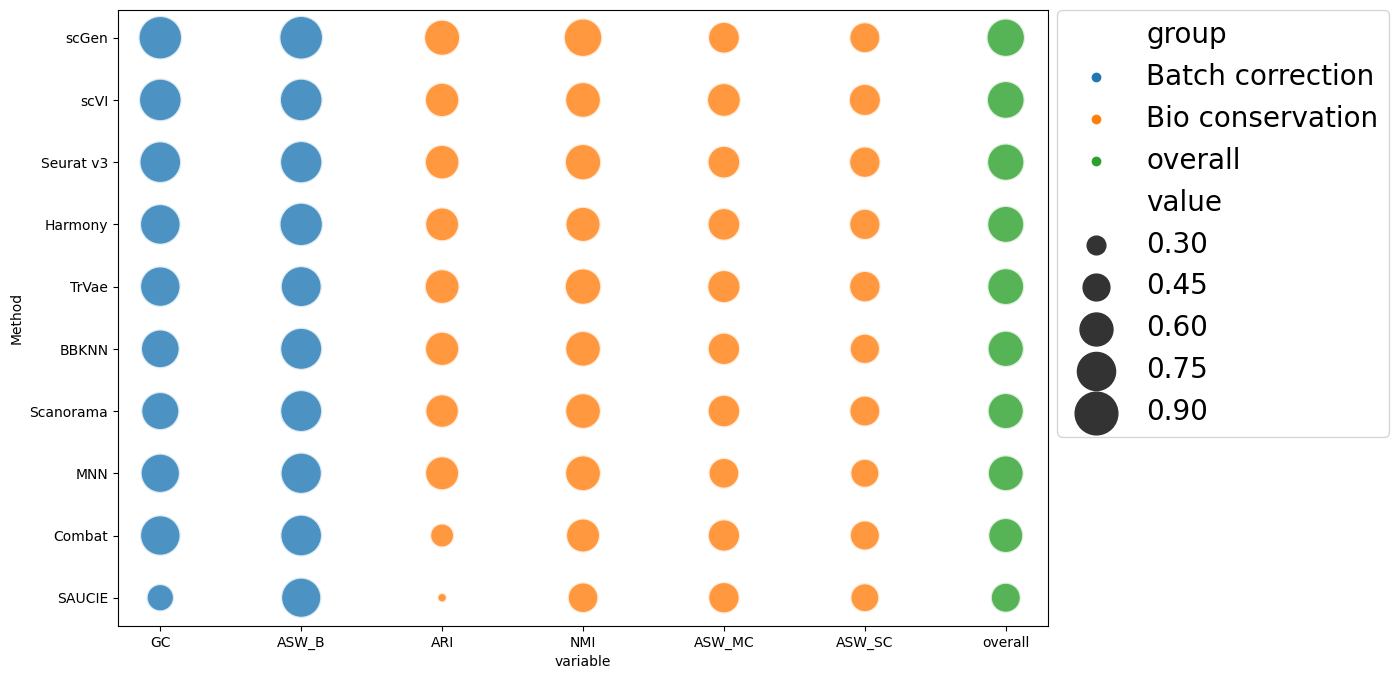

In [23]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.scatterplot(data=df_plot, x="variable", y="Method", size="value", hue="group", sizes=(50, 1000),alpha=0.8,size_order=True,legend="auto")
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0,prop={'size':20})
plt.savefig("Figures4Paper/FigureS1.pdf",bbox_inches='tight')

# visualization umap

In [39]:
file_dict = {"scVI":"processed.scVI.h5ad",
             "Scanorama":"processed.scanorama.h5ad",
             'raw':"processed.raw.h5ad",
             "MNN":"processed.mnn.h5ad",
             "Seurat v3":'processed.seurat.h5ad',
             "BBKNN":'processed.bbknn.h5ad',
             "Harmony":'processed.harmony.h5ad',
             "SAUCIE":'processed.saucie.h5ad',
             "TrVae":'processed.trVAE.h5ad',
             "Combat":'processed.SCANVI.h5ad',
             "scGen":'processed.scgen.h5ad'
            }

In [29]:
plt.rcParams['figure.figsize'] = [6, 6]

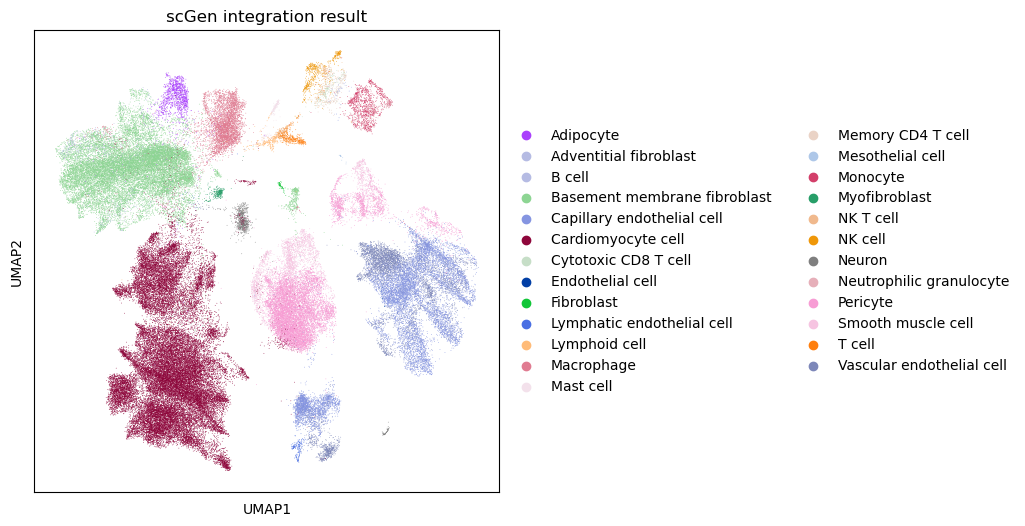

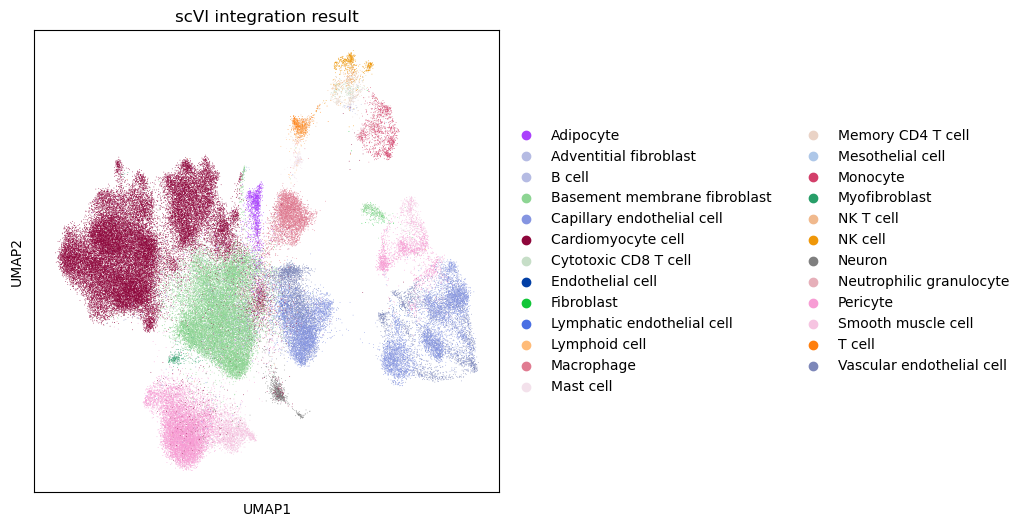

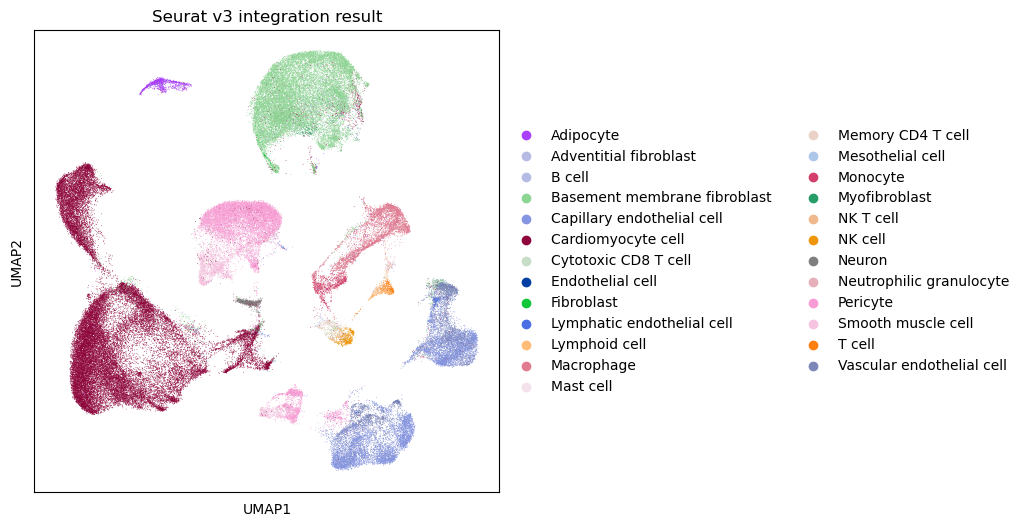

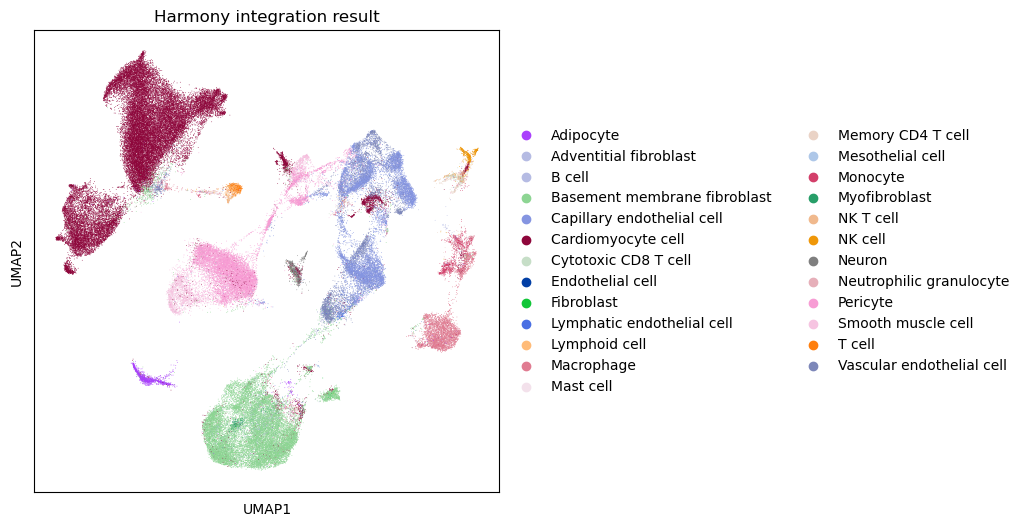

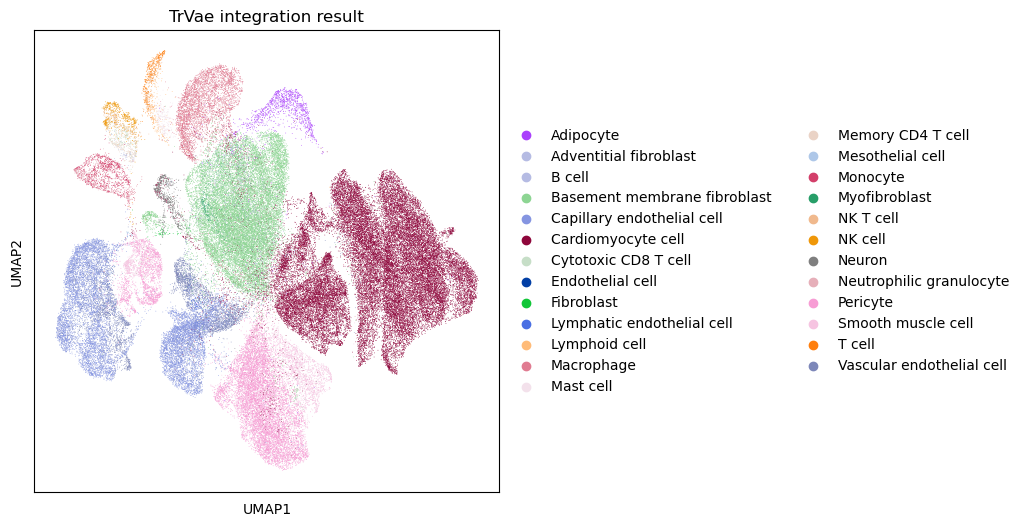

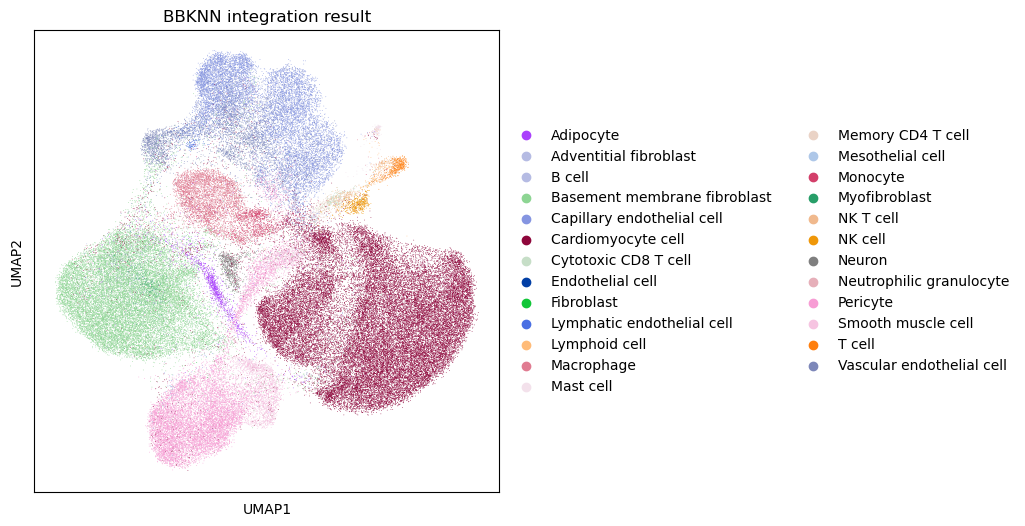

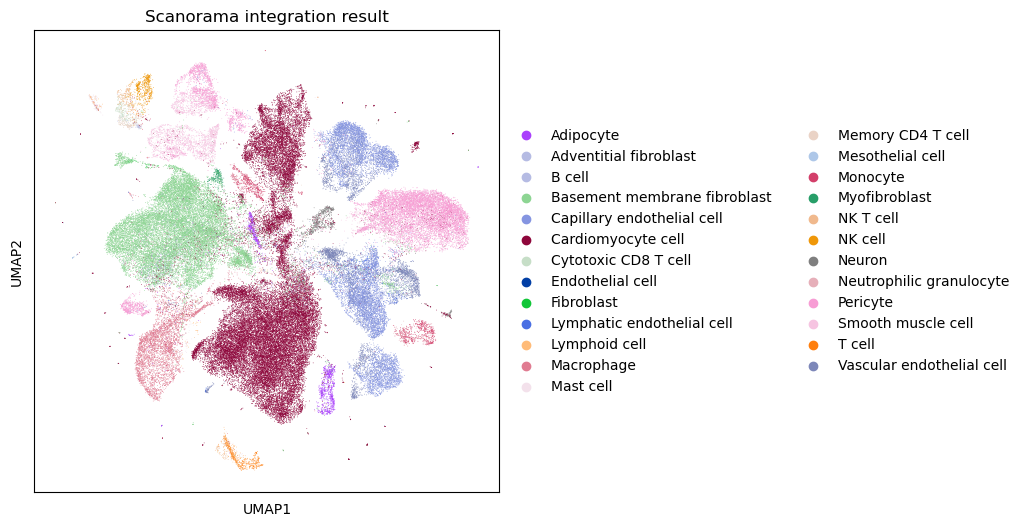

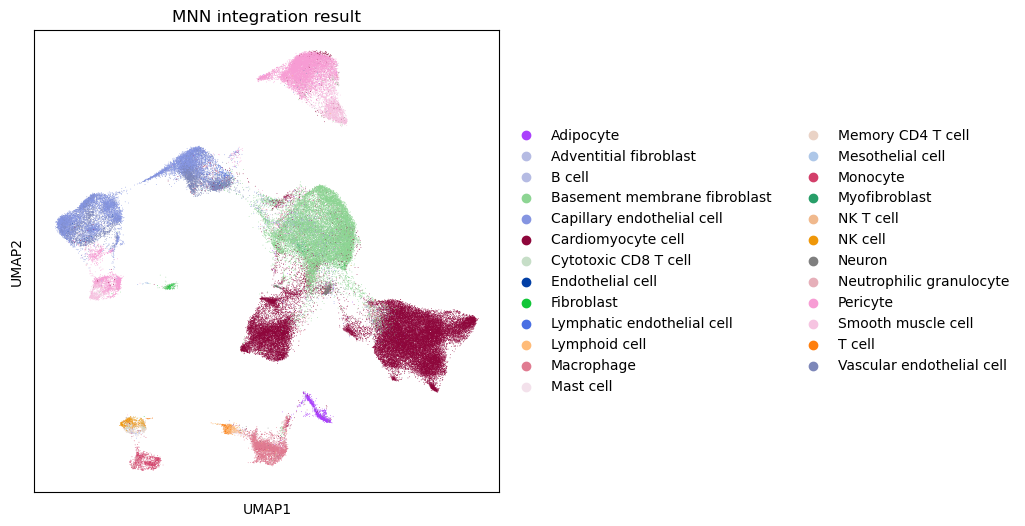

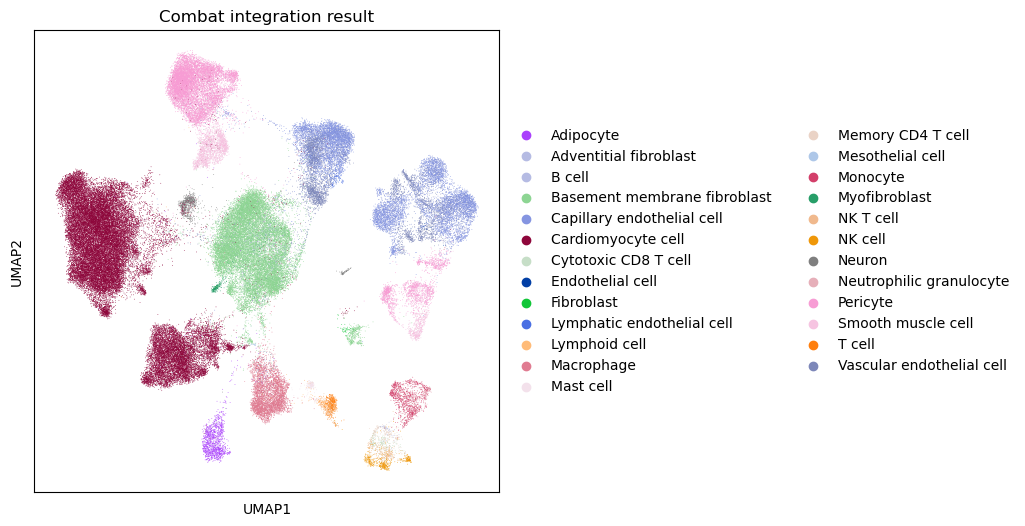

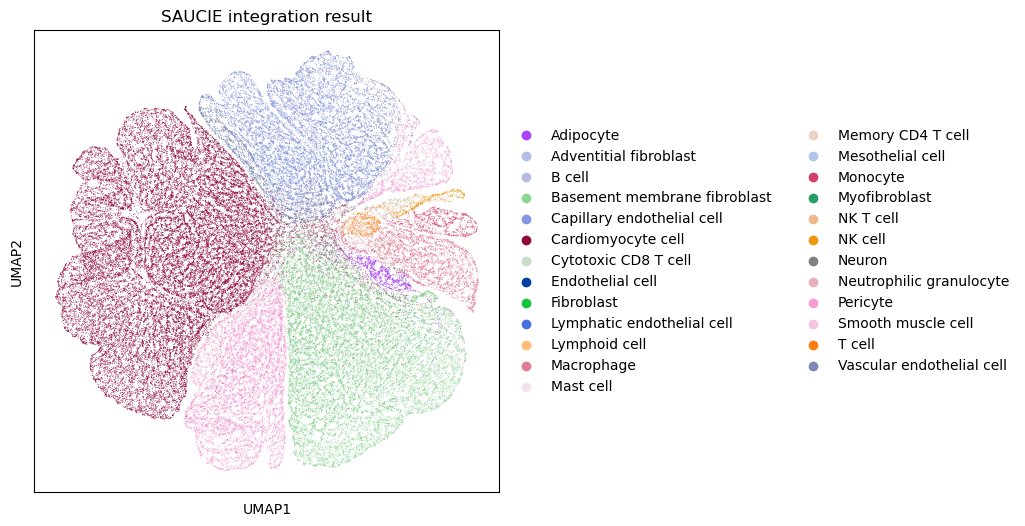

In [48]:
for method in ['scGen', 'scVI', 'Seurat v3', 'Harmony', 'TrVae', 'BBKNN', 'Scanorama', 'MNN', 'Combat', 'SAUCIE']:
    adata = sc.read_h5ad("/data1/chenyx/integration_experiment_result/"+file_dict[method])
    adata.uns['cell_type_colors'] = ['#aa40fc',  '#b5bbe3', '#b5bbe3','#8dd593', '#8595e1', '#8e063b', '#c6dec7', 
                                     '#023fa5', '#11c638', '#4a6fe3', '#ffbb78', '#e07b91', '#f3e1eb', '#ead3c6',
                                     '#aec7e8', '#d33f6a', '#279e68', '#f0b98d', '#ef9708', '#7f7f7f', '#e6afb9',
                                     '#f79cd4', '#f6c4e1', '#ff7f0e', '#7d87b9']
    sc.pl.umap(adata,color="cell_type", title=method + " integration result", save="{}.pdf".format(method))

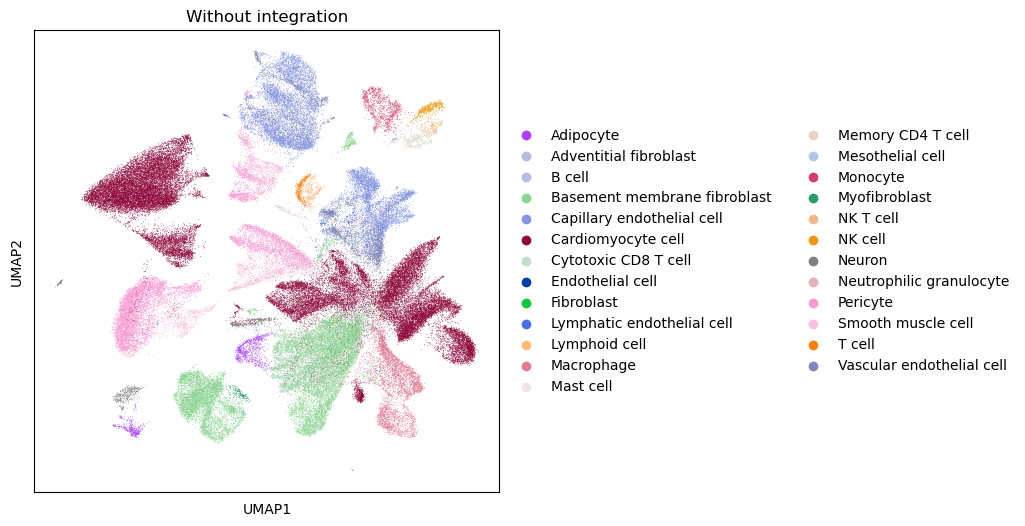

In [49]:
adata = sc.read_h5ad("/data1/chenyx/integration_experiment_result/"+file_dict["raw"])
adata.uns['cell_type_colors'] = ['#aa40fc',  '#b5bbe3', '#b5bbe3','#8dd593', '#8595e1', '#8e063b', '#c6dec7', 
                                 '#023fa5', '#11c638', '#4a6fe3', '#ffbb78', '#e07b91', '#f3e1eb', '#ead3c6',
                                 '#aec7e8', '#d33f6a', '#279e68', '#f0b98d', '#ef9708', '#7f7f7f', '#e6afb9',
                                 '#f79cd4', '#f6c4e1', '#ff7f0e', '#7d87b9']
sc.pl.umap(adata,color="cell_type", title="Without integration", save="{}.pdf".format("raw"))